In [35]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.unicode_minus'] =False
plt.rcParams['font.sans-serif'] = ['SimHei']
    
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(r"D:\code\python\csdn_nlp\word2vector\sgns.target.word-word.dynwin5.thr10.neg5.dim300.iter5\sgns.target.word-word.dynwin5.thr10.neg5.dim300.iter5", binary=False,limit=100000) # 加载时间比较长
#model.init_sims(replace=True)
#因为词向量文件比较大，全部可视化就什么都看不见了，所以随机抽取一些词可视化



In [27]:
# words = list(model.wv.vocab)
# # random.shuffle(words)
# words = random.sample(words, 50)
# words = list(x for x in words if len(x)==2)

In [28]:
# words

In [56]:
corpus = []
B = model.wv.index2word  #获取word2vec训练过的词汇

word_num = 30 # 显示词语的个数

gb = open(r'D:\code\python\csdn_nlp\NLP_DEMO\Resources\dict\THUOCL_medical.txt',encoding='utf-8').readlines()


for word in gb[:word_num]:    #为了方便，每个词库只取了前面30个单词
    word = word.split('\t')
    if word[0] in B:
        corpus.append(word[0])

fb = open(r'D:\code\python\csdn_nlp\NLP_DEMO\Resources\dict\THUOCL_diming.txt',encoding='utf-8').readlines()

for word in fb[:word_num]:
    word = word.split('\t')
    if word[0] in B:
        corpus.append(word[0])
        
vector = model[corpus]


D:\ProgramData\Anaconda3\envs\NLP_DEMO\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [57]:
corpus

['精神',
 '医院',
 '检查',
 '死亡',
 '恢复',
 '意识',
 '医疗',
 '治疗',
 '卫生',
 '患者',
 '检测',
 '接触',
 '监测',
 '应急',
 '缓解',
 '预防',
 '损害',
 '疾病',
 '手术',
 '病人',
 '人体',
 '感染',
 '症状',
 '医学',
 '一次性',
 '诊断',
 '医药',
 '防治',
 '辐射',
 '生物',
 '北京',
 '美国',
 '医院',
 '学校',
 '法院',
 '小区',
 '市委',
 '公园',
 '南方',
 '市政府',
 '公安',
 '公安局',
 '派出所',
 '酒店',
 '广场',
 '城区',
 '北京市',
 '公交',
 '小学',
 '广东省',
 '学院',
 '机场',
 '德国',
 '图书馆',
 '公路',
 '亚洲',
 '电视台',
 '省政府',
 '大陆']

In [58]:
number_of_pointer = len(vector)

[t-SNE] Computing 58 nearest neighbors...
[t-SNE] Indexed 59 samples in 0.000s...
[t-SNE] Computed neighbors for 59 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 59 / 59
[t-SNE] Mean sigma: 2.419015
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.599464
[t-SNE] KL divergence after 2350 iterations: 0.160630


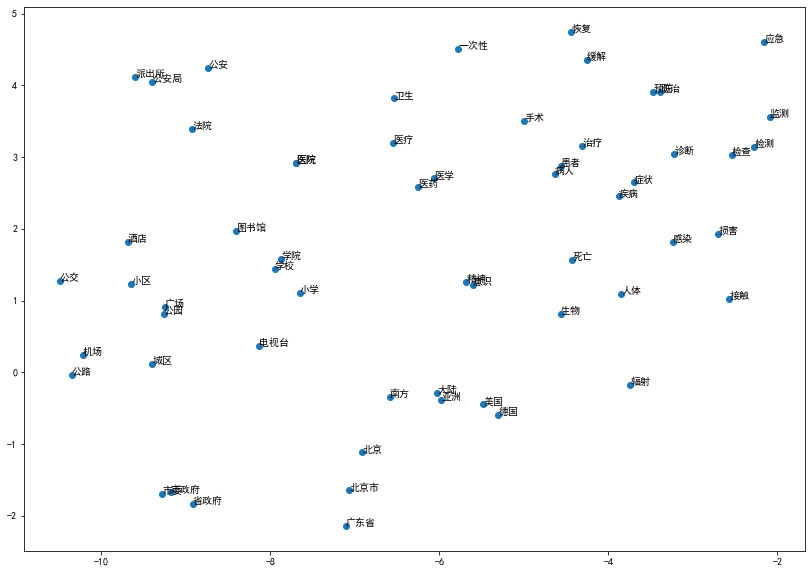

In [60]:
# vector = model[words]
tsne = TSNE(n_components=2,init='random',n_iter=3000,verbose=1)
embedd = tsne.fit_transform(vector)
 
#可视化
plt.figure(figsize=(14,10))
plt.scatter(embedd[:number_of_pointer,0], embedd[:number_of_pointer,1])
 
for i in range(number_of_pointer):
    x = embedd[i][0]
    y = embedd[i][1]
    plt.text(x, y, corpus[i])
plt.show()

In [3]:
from tqdm import tqdm # progression bars
import numpy as np
from sklearn.manifold import TSNE

# 限量读取 
number = 2000 

with open(r'D:\code\python\csdn_nlp\word2vector\sgns.target.word-word.dynwin5.thr10.neg5.dim300.iter5\sgns.target.word-word.dynwin5.thr10.neg5.dim300.iter5','r+',encoding='utf-8',) as f:
    header = f.readline()
    vocab_size, vector_size = map(int, header.split())
    words, embeddings = [], []
    for line in tqdm(range(number)):
        word_list = f.readline().split(' ')
        word = word_list[0]
        vector = word_list[1:-1]
        words.append(word)
        embeddings.append(np.array(vector))
        
# print(words[9:10])
# print(embeddings[9:10])




100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 9549.20it/s]
